In [10]:
# Libraries you will find useful
import numpy as np
import math
import scipy 
import skimage
import cv2
from scipy.ndimage.filters import gaussian_laplace, gaussian_filter
import time
# Starter code for Assignment 2 Part 2: Scale-space blob detection





/var/folders/2d/mqx8_d3j7sz1dwfnhtqnd3c00000gn/T/ipykernel_74066/196816523.py:7: DeprecationWarning: Please use `gaussian_laplace` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_laplace, gaussian_filter
/var/folders/2d/mqx8_d3j7sz1dwfnhtqnd3c00000gn/T/ipykernel_74066/196816523.py:7: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_laplace, gaussian_filter


In [11]:

%matplotlib inline
import matplotlib.pyplot as plt

In [12]:
# To display the detected regions as circle
from matplotlib.patches import Circle
def show_all_circles(image, cx, cy, rad, color='r'):
    """
    image: numpy array, representing the grayscsale image
    cx, cy: numpy arrays or lists, centers of the detected blobs
    rad: numpy array or list, radius of the detected blobs
    """
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.imshow(image, cmap='gray')
    for x, y, r in zip(cx, cy, rad):
        circ = Circle((x, y), r, color=color, fill=False)
        ax.add_patch(circ)

    plt.title('%i circles' % len(cx))
    plt.show()

Extra Credit:

In [13]:
def dog(image, sigma):
    a = gaussian_filter(image, sigma)
    k = sigma * 1.25
    b = gaussian_filter(image, k)
    return a-b



356 493
time:  1.6123898029327393


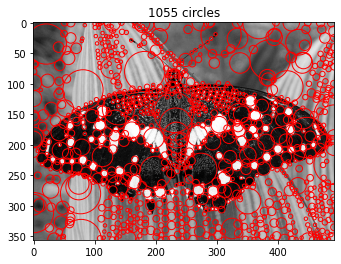

In [14]:
# convert images to grayscale
# rescale the intensities to between 0 and 1 (simply divide them by 255 should do the trick)
start_time = time.time()
img_file = 'part2_images/butterfly.jpg'
img = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
img = img / 255
h, w = img.shape
print(h,w)


# Create the Laplacian filter
# Pay careful attention to setting the right filter mask size. Hint: Should the filter width be odd or even?


# filtering the image (two implementations)
# one that increases filter size, and one that downsamples the image
# For timing, use time.time()

k = 2
case = 1
factor = 1.25
threshold = 0.0001
iteration = 12

scale_space = np.empty((h, w, iteration))
filter_space = np.empty((h, w, iteration))


for i in range(iteration):
    if case == 1:
        sig = k * (factor**i)
        gol_img = sig * sig * gaussian_laplace(img, sig)
        
        sq = gol_img ** 2
    
        scale_space[:,:, i] = sq
        filter_space[:, :, i] = scipy.ndimage.rank_filter(sq, -1, size=(5,5))
    elif case == 2:
        scale = 1.0 / (factor ** i)
        img_ds = skimage.transform.resize(img, (scale * h, scale * w))
        filter_img = gaussian_laplace(img_ds, k) ** 2
        img_us = skimage.transform.resize(filter_img, (h, w))
        scale_space[:,:, i] = img_us
        filter_space[:, :, i] = scipy.ndimage.rank_filter(img_us, -1, size=(5,5))
    else:
        sig = k * (factor**i)
        gol_img = dog(img, sig)
        sq = gol_img ** 2
        scale_space[:,:, i] = sq
        filter_space[:, :, i] = scipy.ndimage.rank_filter(sq, -1, size=(5,5))


cx = []
cy = []
rad = []

points = np.zeros((h, w, iteration))
for i in range(h):
    for j in range(w):
        max_index = np.argmax(filter_space[i, j, :])
        var = filter_space[i, j, max_index]
        if var >= threshold and var == scale_space[i, j, max_index]:
            points[i, j, max_index] = var


for i in range(iteration):  
    a, b = np.nonzero(points[:,:,i])
    cx.extend(a)
    cy.extend(b)
    rad.extend([math.sqrt(2) * k * (factor**i)]*len(a))
    

end_time = time.time()
print("time: ", end_time - start_time)

show_all_circles(img, cy, cx, rad, color='r')
    
    
